# FAKE NEWSS DETETCTION

We consume news through several mediums throughout the day in our daily routine, but sometimes it becomes difficult to decide which one is fake and which one is authentic. Our job is to create a model which predicts whether a given news is real or fake.

## REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import string


## READING DATA

In [2]:
data_fake = pd.read_csv(r"C:\Users\Samiksha\Desktop\Fake news detection\dataset\Fake.csv")
data_true = pd.read_csv(r"C:\Users\Samiksha\Desktop\Fake news detection\dataset\True.csv")

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_21848\2357238137.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  data_fake = pd.read_csv(r"C:\Users\Samiksha\Desktop\Fake news detection\dataset\Fake.csv")


In [3]:
data_fake.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_fake.shape

(23502, 172)

In [6]:
data_true.shape

(21417, 4)

## DATA CLEANING & PREPROCESSING

In [7]:
# add flag to track fake and real
data_fake['target'] ='fake'
data_true['target'] = 'true'

In [8]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis = 0, inplace = True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_fake.drop([i], axis = 0, inplace = True)

In [9]:
data_fake.shape, data_true.shape

((23482, 173), (21417, 5))

In [10]:
data_fake_manual_testing["target"] = 'fake' 
data_true_manual_testing["target"] = 'true'

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_21848\3355788834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["target"] = 'fake'
C:\Users\Samiksha\AppData\Local\Temp\ipykernel_21848\3355788834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["target"] = 'true'


In [11]:
data_fake_manual_testing.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
23492,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
23493,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
23494,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
23495,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
23496,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake


In [12]:
data_true_manual_testing.head()

,title,text,subject,date,target
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",true
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",true
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",true
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",true


In [13]:
# concatenate dataframes
data = pd.concat([data_fake,data_true]).reset_index (drop = True)
data.shape

(44899, 173)

In [14]:
# shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop = True)

#check the data
data.head(5)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,Hillary’s New 404 Page On Her Website Is Actu...,Every website has a 404 page that you land on ...,News,"April 11, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,Wife of disgraced Mexican governor taking 'ref...,MEXICO CITY (Reuters) - The wife of a detained...,worldnews,"December 12, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,California legislature passes climate change b...,SAN FRANCISCO (Reuters) - California lawmakers...,politicsNews,"August 24, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
3,UK counter-terrorism police charge 14-year-old...,LONDON (Reuters) - Two 14-year-old boys from n...,worldnews,"November 1, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
4,Hamas picks new deputy chief whom Israel blame...,GAZA (Reuters) - The Palestinian Islamist grou...,worldnews,"October 5, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


In [15]:
data.tail(5)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
44894,End 'containment' of asylum-seekers on islands...,ATHENS (Reuters) - Over a dozen human rights g...,worldnews,"October 23, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
44895,Turkey's Erdogan says major operation in Syria...,ANKARA (Reuters) - Turkish President Tayyip Er...,worldnews,"October 7, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
44896,Trump Loses His Sh*t Over SNL Skit And Alec B...,"Once again, Donald Trump threw a temper tantru...",News,"November 20, 2016",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
44897,WACKO LIBERAL PUNDIT: ‘GOOD NEWS’ BECAUSE ISIS...,,left-news,"May 11, 2015",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
44898,U.S. ends temporary protected status for Sudan...,WASHINGTON (Reuters) - The United States is en...,worldnews,"September 18, 2017",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44899 entries, 0 to 44898
Columns: 173 entries, title to target
dtypes: object(173)
memory usage: 59.3+ MB


In [17]:
# removing the date
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,Hillary’s New 404 Page On Her Website Is Actu...,Every website has a 404 page that you land on ...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,Wife of disgraced Mexican governor taking 'ref...,MEXICO CITY (Reuters) - The wife of a detained...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,California legislature passes climate change b...,SAN FRANCISCO (Reuters) - California lawmakers...,politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
3,UK counter-terrorism police charge 14-year-old...,LONDON (Reuters) - Two 14-year-old boys from n...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
4,Hamas picks new deputy chief whom Israel blame...,GAZA (Reuters) - The Palestinian Islamist grou...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


In [18]:
# removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,Every website has a 404 page that you land on ...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,MEXICO CITY (Reuters) - The wife of a detained...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,SAN FRANCISCO (Reuters) - California lawmakers...,politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
3,LONDON (Reuters) - Two 14-year-old boys from n...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
4,GAZA (Reuters) - The Palestinian Islamist grou...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


In [19]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text


<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Samiksha\AppData\Local\Temp\ipykernel_21848\1730589901.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', ' ', text)
C:\Users\Samiksha\AppData\Local\Temp\ipykernel_21848\1730589901.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+', ' ', text)
C:\Users\Samiksha\AppData\Local\Temp\ipykernel_21848\1730589901.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', ' ', text)


In [20]:
data['text'] = data['text'].apply( wordopt)

In [21]:
# check data
data.head()

,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,every website has a page that you land on if...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,mexico city reuters the wife of a detained...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
2,san francisco reuters california lawmakers...,politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
3,london reuters two year old boys from no...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
4,gaza reuters the palestinian islamist grou...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


## BASIC DATA EXPLORATION

subject
 Karl Marx is either a villain or a hero of social engineering                                                                                                                                                                                                                                      2
 Politics According to the Bible and (with Barry Asmus) The Poverty of Nations: A Sustainable Solution.Via: Townhall"                                                                                                                                                                               1
 a future nuclear family                                                                                                                                                                                                                                                                            2
 and so is Mr. Katzenbach                                                                                     

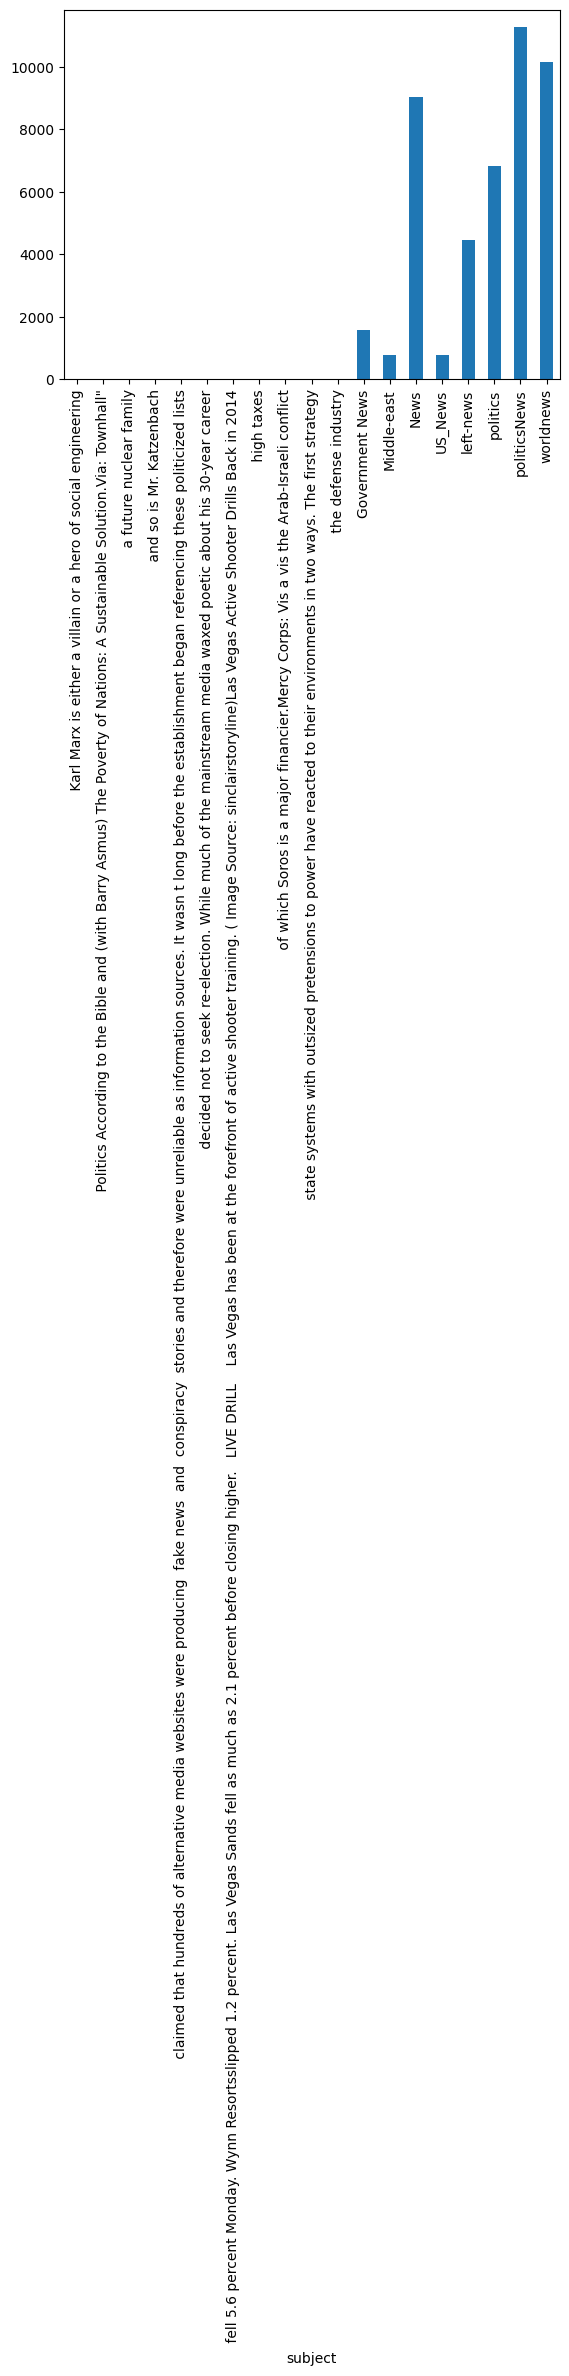

In [22]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind = "bar")
plt.show()

target
fake    23482
true    21417
Name: text, dtype: int64


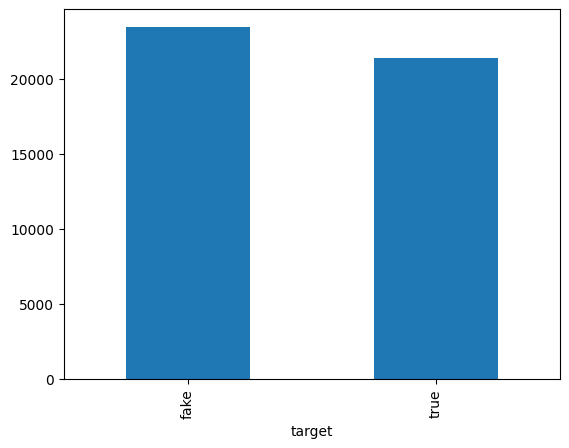

In [23]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind = "bar")
plt.show()

In [24]:
!pip install wordcloud

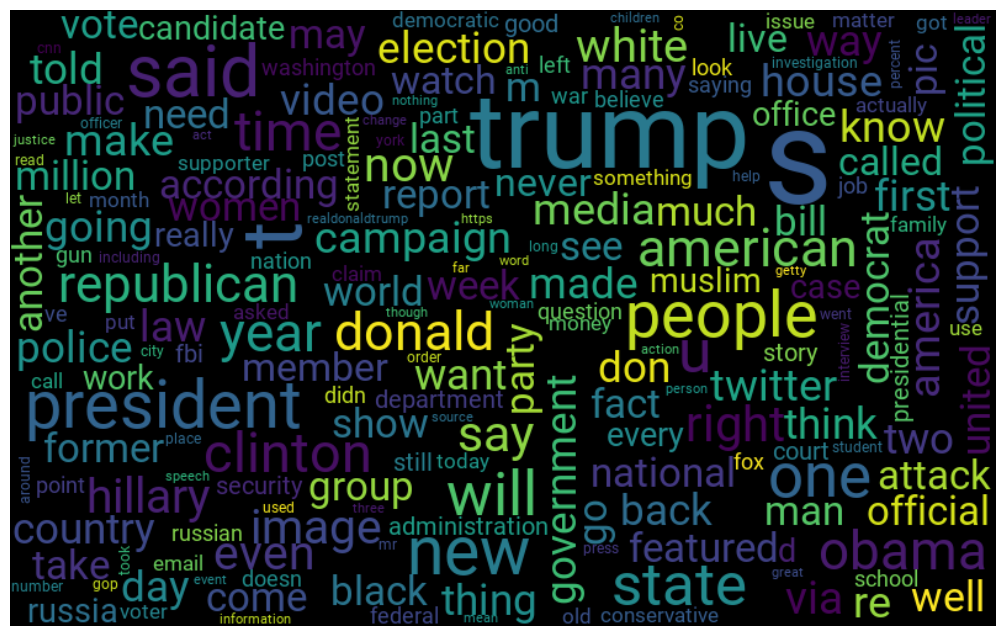

In [25]:
from wordcloud import WordCloud

data_fake = data[data["target"] == 'fake' ]
all_words = ' '.join([text for text in data_fake.text])

font_path = r"C:\Users\Samiksha\Downloads\Roboto\Roboto-Regular.ttf" 
wordcloud = WordCloud (width = 800, height = 500,
                       max_font_size = 110, font_path=font_path,
                       collocations = False).generate(all_words)
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

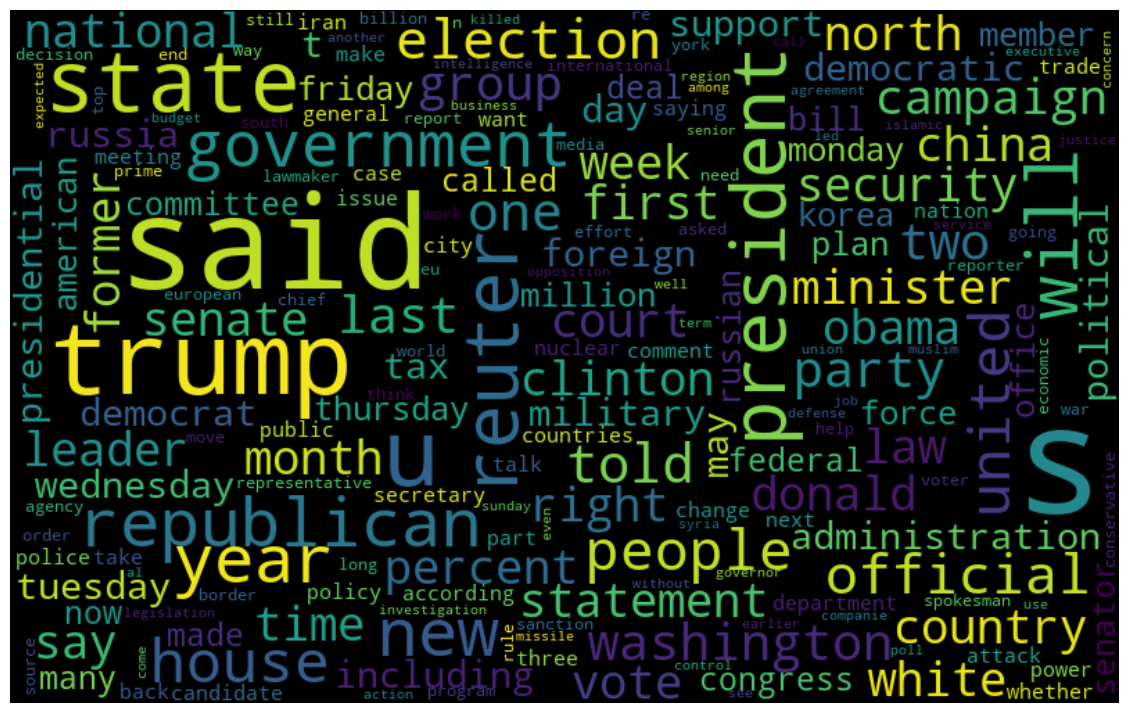

In [26]:
data_true = data[data["target"] == 'true' ]
all_words = ' '.join([text for text in data_true.text])
 
font_path = r"C:\Users\Samiksha\Downloads\Roboto\Roboto-Regular.ttf"     
wordcloud = WordCloud (width = 800, height = 500,
                       max_font_size = 110,
                       collocations = False).generate(all_words)

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## SPLIT DATA 

In [27]:
x = data["text"]
y = data["target"]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [30]:
x_train.head()

44064    mark anderson    century wirethe greek philoso...
38454    washington  reuters    u s  republican senator...
42477    washington  reuters    president barack obama ...
24386    during the democrats  first debate last month ...
27843    cox s bazar  bangladesh  reuters    twelve yea...
Name: text, dtype: object

In [31]:
y_train.head()

44064    fake
38454    true
42477    true
24386    fake
27843    true
Name: target, dtype: object

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## MODEL FITTING

In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [34]:
pred_lr = LR.predict(xv_test)

In [35]:
LR.score(xv_test, y_test)

0.9859688195991091

In [36]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

        fake       0.99      0.98      0.99      4783
        true       0.98      0.99      0.99      4197

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [37]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [38]:
pred_dt = DT.predict(xv_test)

In [39]:
DT.score(xv_test, y_test)

0.9961024498886414

In [40]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

        fake       1.00      1.00      1.00      4783
        true       1.00      0.99      1.00      4197

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [41]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [42]:
pred_gb = GB.predict(xv_test)

In [43]:
GB.score(xv_test, y_test)

0.9959910913140312

In [44]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4783
        true       0.99      1.00      1.00      4197

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [45]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)


RandomForestClassifier(random_state=0)

In [46]:
pred_rf = RF.predict(xv_test)

In [47]:
RF.score(xv_test, y_test)

0.9896436525612472

In [48]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4783
        true       0.99      0.99      0.99      4197

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [49]:
def output_label(n):
    if n == 'fake':
        return "Fake News"
    elif n == 'true':
        return "True News"

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)
    
    print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(
        output_label(pred_LR[0]),
        output_label(pred_DT[0]),
        output_label(pred_GB[0]),
        output_label(pred_RF[0]),
        
    ))

In [50]:
news = str(input())
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction: Fake News 
RF Prediction: Fake News


In [51]:
news = str(input())
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GB Prediction: Fake News 
RF Prediction: Fake News
